# MNIST OCR Model
##### Taken from [here](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)

## Initial setup

In [3]:
# imports and utils
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
from time import time

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim

import torchvision
from torchvision import datasets, transforms
from google.colab import drive

drive.mount('/content/gdrive')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.'''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('gdrive/MyDrive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('gdrive/MyDrive/mnist/MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

## Training - start here if you want to train a new model

images type: <class 'torch.Tensor'>
images shape: torch.Size([64, 1, 28, 28])
labels shape: torch.Size([64])


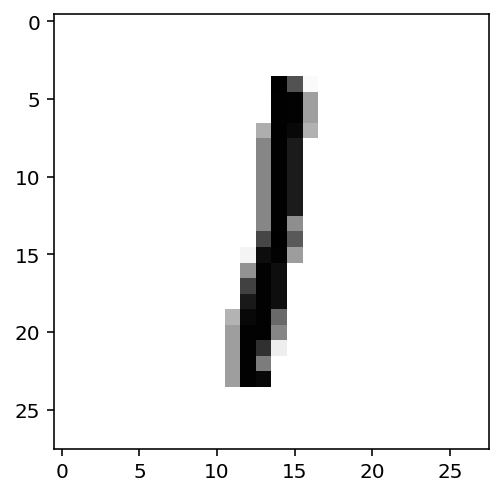

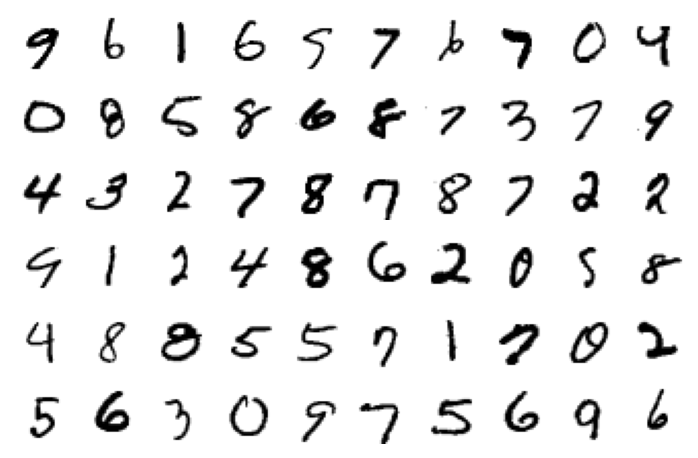

In [5]:
# Visualize the data
dataiter = iter(trainloader)
images, labels = dataiter._next_data()
print(f'images type: {type(images)}')
print(f'images shape: {images.shape}')
print(f'labels shape: {labels.shape}')

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
# Layer details for the neural network
input_size = 784 # = 28 * 28
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [7]:
# Set loss criterion
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [8]:
print(logps.shape)
print(labels.shape)
print(len(torch.unique(labels)))
labels.shape

torch.Size([64, 10])
torch.Size([64])
10


torch.Size([64])

In [9]:
# Train the model
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 25
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6666424909729693
Epoch 1 - Training loss: 0.28156394189767747
Epoch 2 - Training loss: 0.2167294894986506
Epoch 3 - Training loss: 0.17379510627467748
Epoch 4 - Training loss: 0.143439916800509
Epoch 5 - Training loss: 0.12378380398776358
Epoch 6 - Training loss: 0.10909858411912725
Epoch 7 - Training loss: 0.09639906951748549
Epoch 8 - Training loss: 0.08603582801128518
Epoch 9 - Training loss: 0.07804050978406199
Epoch 10 - Training loss: 0.07011240524009489
Epoch 11 - Training loss: 0.06495628775264234
Epoch 12 - Training loss: 0.060157067927299565
Epoch 13 - Training loss: 0.055705940930981
Epoch 14 - Training loss: 0.050922398706391724
Epoch 15 - Training loss: 0.04839094477702679
Epoch 16 - Training loss: 0.043986317359838385
Epoch 17 - Training loss: 0.040972094918325194
Epoch 18 - Training loss: 0.03751122944755976
Epoch 19 - Training loss: 0.034320970486625156
Epoch 20 - Training loss: 0.03340231469028872
Epoch 21 - Training loss: 0.03216720201178833

In [10]:
# Save model
torch.save(model, 'gdrive/My Drive/mnist/mnist_ocr_model')

## Load OCR model - start here if you want to load an existing model


In [ ]:
# Load model
model = torch.load('drive/My Drive/mnist/mnist_ocr_model')

FileNotFoundError: ignored

## Evaluate the model

Predicted Digit = 4


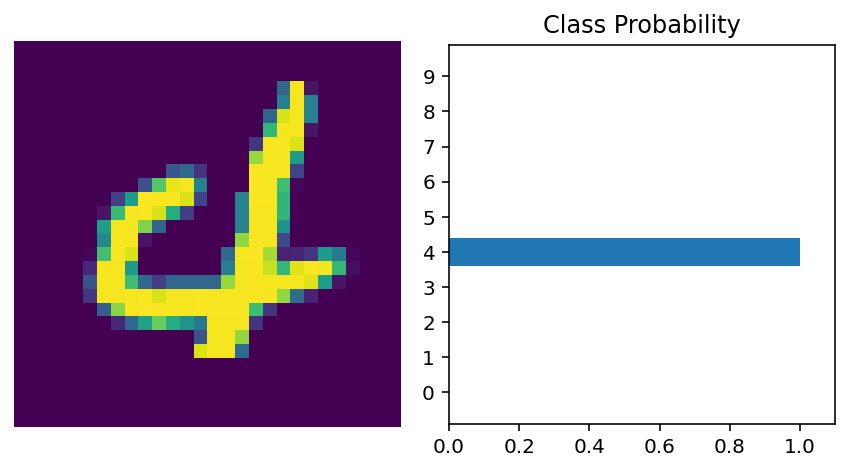

In [11]:
# Visualize the model's ability to classify digits
images, labels = next(iter(valloader))

img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [12]:
# Evaluate the model's accuracy
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9759
